In [1]:
%matplotlib inline
import numpy as np
from time import sleep
from IPython.display import clear_output
from matplotlib import pyplot as plt


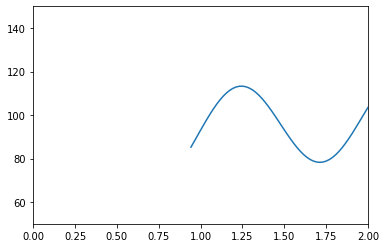

In [11]:


rng = np.random.default_rng()
num_years = 2
seasonality = 20
average_price = 100

num_weeks = 52 * num_years + 1
dt = 1.0 / 52
week_indices = list(range(num_weeks))
delivery_times = [ i / 52 for i in week_indices ]

#fig, ax = plt.subplots()
#line, = ax.plot([])
#ax.set_xlim(0, num_years)
#ax.set_ylim(50, 150)

forward_prices = [average_price  + np.sin(i * 2 * np.pi / 51) * seasonality for i in range(num_weeks)]


alpha = 1.5
sigma = 0.6

kappa = 0.5
spot_daily_std_dev = 2.0
spot_weekly_std_dev = spot_daily_std_dev * np.sqrt(7)
#line.set_data((delivery_times, forward_prices))
#plt.show()

def risk_adj(s):
    return 0.5 * s * s * dt

def move_to_week2(i_week):
    for i in range(len(forward_prices)):
        pass
        #forward_prices[i] += 1 
    line.set_data((delivery_times, forward_prices))
    plt.show()
    sleep(0.5)
    clear_output(wait=True)
    
def move_to_week(i_week):

    fig, ax = plt.subplots()
    line, = ax.plot([])
    ax.set_xlim(0, num_years)
    ax.set_ylim(50, 150)

    dz = rng.normal(scale=dt)
    live_week_indices = week_indices[i_week:]
    t = delivery_times[i_week]
    #spot_price = forward_prices[i_week]
    #ma_price = forward_prices[i_week + 4]

    
    for i in live_week_indices:
        T = delivery_times[i]
        scaled_sigma = sigma * np.exp(- alpha * (T - t))
        forward_prices[i] *= np.exp(scaled_sigma * dz - risk_adj(scaled_sigma))
    #d_spot = rng.normal(scale=spot_weekly_std_dev)
    #forward_prices[i_week] += kappa * (ma_price - spot_price) + d_spot
    line.set_data(delivery_times[i_week:], forward_prices[i_week:])
    plt.show()
    clear_output(wait=True)
    sleep(0.1)
    
num_time_steps = 50
    
for i_week in range(num_time_steps):
    move_to_week(i_week)
